# Black Body Radiation
Authors:  A + B



In [1]:
import numpy as np
import matplotlib.pylab as plt
from src.support import *

plt.style.use('seaborn-ticks')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Introduction

Objects with temperatures larger than absolute zero ( 0 K or -273.15 °C) emit energy in terms of electromagnetic radiation. This is the phenomenon of blackbody radiation. Black bodies are idealized objects that perfectly absorb incident radiation of any frequency and angle of incidence. They do not reflect any light, nor do they allow any light to pass through it. That is why black bodies appear black at room temperature. In contrast, a white body would reflect all incident radiation uniformly in all directions (add some references).

In thermal equilibrium, that is at a constant temperature, black bodies emit electromagnetic radiation. The emission spectrum of this black body radiation follows Planck's law and is solely determined by the object's temperature. Shape or composition of a black body has no impact on its emission spectrum. With increasing temperature blackbodies emit more light at all wavelengths. This means, when comparing two blackbodies, the hotter one will always emit more light than the cooler one, regardless of the wavelength.

The emission spectrum of a blackbody is continuous and peaks at a specific wavelength, at which the intensity of the spectrum is maximal. This peak wavelength of the blackbody radiation shifts to shorter wavelengths for hotter objects. 
In terms of visible light, the hotter a blackbody is the bluer the peak wavelength of its emission will be.

A detailed explanation of the blackbody radiation requires knowledge on quantum mechanics as pioneered by Max Planck in 1900. A full quantum mechanical description of the black body phenomenon is beyond the scope of this workshop.

In reality, there exists no ideal blackbody, but many objects like light bulbs, candles, hot metal or lava behave approximately like black bodies.

The black body radiation has particular relevance for cosmology and astrophysics. One of the best measurements of a naturally occurring black body emission spectrum was obtained by ESA's Planck satellite mission, which observed the cosmic microwave background radiation, a relic radiation of the hot big bang from the beginning of our Universe.
Also, the emission spectrum of stars, which are hot luminous spheroids of gaseous plasma, can be approximated by a Planck law.

In the course of this workshop, we want to use the phenomenon of blackbody radiation to make sense of astrophysical observations. 



# Discovering Wien's displacement law

At the beginning of the 20th-century studies of blackbodies revealed new insights into the interaction between matter and radiation and triggered a revolution: The development of quantum mechanics. Modern technical advances, such as LASER technology or modern semiconductors for computers exploit the principles of quantum mechanics which have first been investigated by Planck, Bohr, Heisenberg and others. The discovery and understanding of the blackbody radiation, therefore, played an important role in modern science, technology and our society.   

In the context of astronomy and cosmology, black body radiation can be used to study features of observed celestial objects like stars or galaxies.

Despite its complex quantum mechanical origin, the blackbody emission spectrum exhibits some simple features.

As stated above, the blackbody emission spectrum follows a continuous Planck law, which is solely determined by a single temperature. With increasing temperature the overall radiated energy increases and the peak of the emission spectrum moves to shorter wavelengths. Therefore the hotter a blackbody will be, the bluer the peak wavelength will appear.  

In consequence there exists a unique relation between the temperature and the peak wavelength of a blackbody emission spectrum.

As a first task we seek to discover this universal relationship between temperature and peak wavelength.


## How are temperature and peak wavelength related for blackbody radiation?

Below you will be provided with several Planck spectra for different temperatures. You are supposed to discover the relation between the temperature and the peak wavelength of maximal emission of a blackbody radiator.

There are several paths towards the solution, find your own way. You may use programming techniques, analytical derivations or use paper and pencil to plot and derive this universal law.

You should finish this task within 15 min.


## Some sample blackbody spectra for different temperatures

Here you are given some blackbody emission spectra at different temperatures. You should use these to derive the relation between temperature and peak wavelength.

/Users/jens/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


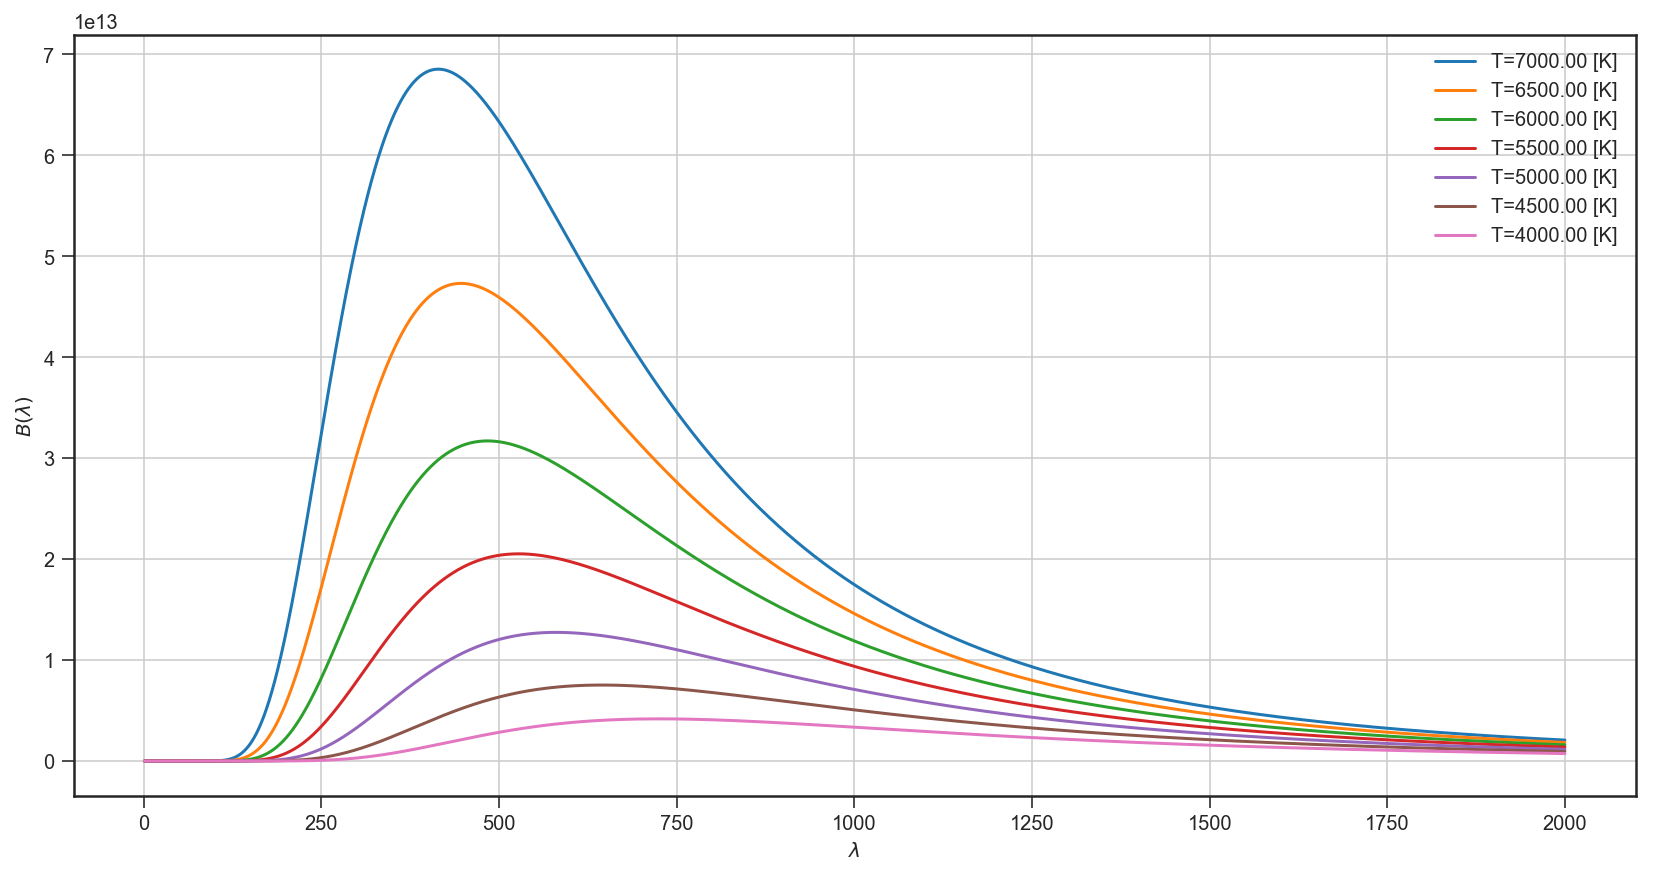

In [2]:
h = 6.626e-34
c = 3.0e+8
k = 1.38e-23

def planck(wav, T):
    a = 2.0*h*c**2
    b = h*c/(wav*k*T)
    intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )
    return intensity

# generate x-axis in increments from 1nm to 3 micrometer in 1 nm increments
# starting at 1 nm to avoid wav = 0, which would result in division by zero.
wavelengths = np.arange(1e-9, 2e-6, 1e-10) 

#generate 10 temperatures

intensity=[]
Temp=[]
ntemp=4

Temps=np.array([7000,6500,6000,5500,5000,4500,4000])


plt.figure(figsize=(14, 7))
for T in Temps:
    B = planck(wavelengths, T)
    intensity.append(B)
    Temp.append(T)
    plt.plot(wavelengths*1e9, B,label='T='+'{:06.2f}'.format(T)+' [K]') 
    plt.ylabel(r'$B(\lambda)$')
    plt.xlabel(r'$\lambda$')

'''
for i in range(ntemp):
    T = np.random.uniform(1000,10000,1)[0]
    B = planck(wavelengths, T)
    intensity.append(B)
    Temp.append(T)
    plt.plot(wavelengths*1e9, B,label='T='+'{:06.2f}'.format(T)+' [K]') 
    plt.ylabel(r'$B(\lambda)$')
    plt.xlabel(r'$\lambda$')
'''

# show the plot
plt.grid()
plt.legend()
plt.show()

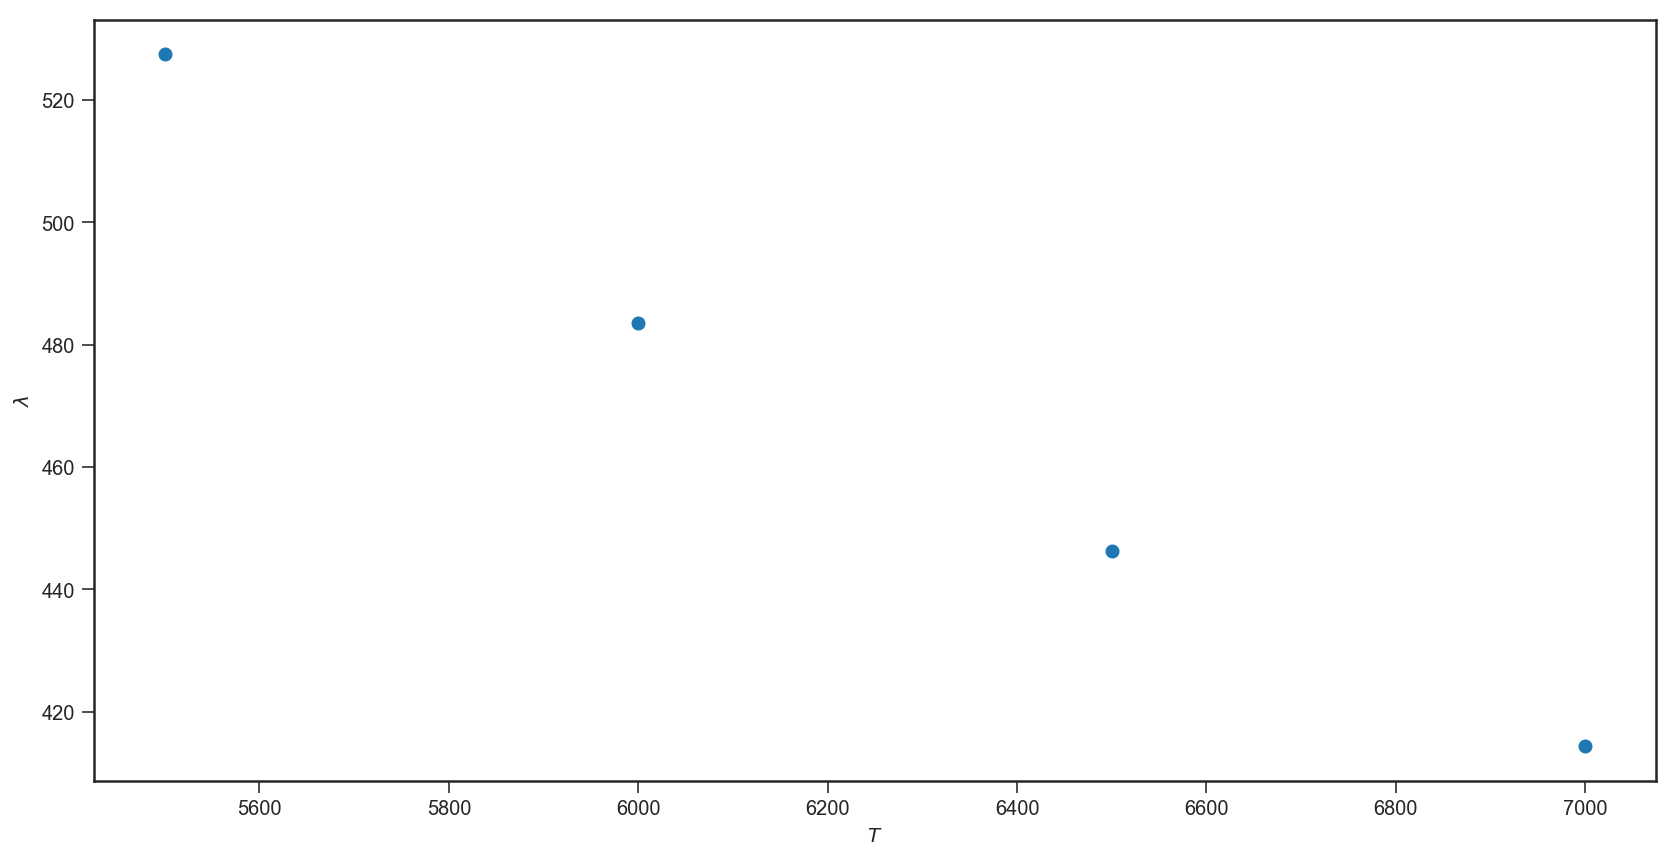

In [3]:
#get maximum
lmax=[]
Tmax=[]
for i in range(ntemp):
    l = np.argmax(intensity[i])
    lmax.append(wavelengths[l]*1e9)
    Tmax.append(Temp[i])


plt.figure(figsize=(14, 7))    
plt.scatter(np.array(Tmax),np.array(lmax))
plt.xlabel(r'$T$')
plt.ylabel(r'$\lambda$')
plt.show()

## Solution

In the early 1890s Wilhelm Wien investigated thermodynamics and coined the term black body for an ideal radiator. He discovered that the wavelength of maximum energy emitted from a perfect black body was inversely proportional to the temperature of the body, λmax is proportional to 1/T. This relationship is known as Wien's Law in his honour.

# Stars: lighthouses of the galaxy

There are billions of stars in our galaxy, the milky way. In particular, our Sun is a medium-sized star. Each of the stars in the galaxy can be considered as an enormous ball of very hot gaseous plasma. Stars are born in so-called star-forming regions consisting of large clouds of hydrogen and a bit of helium gas. These clouds collapse due to their own gravity leading to heating of the gas. Once the gas reaches sufficiently high temperatures nuclear fusion processes are ignited. These nuclear processes produce enormous amounts of heat and radiation. A new star is born. Stars can exist for billions of years until they run out of fuel. During their final stages, stars become giants by expanding to enormous sizes, while their cores contract. Eventually, these stars explode and turn into dim, cold objects like black dwarfs, neutron stars or black holes, depending on their initial mass. Generally, the most massive stars have the shortest lifespan. More massive stars burn hotter and faster than their lighter counterparts like our sun. 

These stars create almost all of the visible light in our galaxy.

<img src="http://sci.esa.int/science-e-media/img/09/ESA_Gaia_DR2_AllSky_Brightness_Colour_black_bg_625.jpg" width="50%">

This emitted stellar light tells a story about each star. Ever since the beginning of Astronomy, researchers have used this observed star light to conclude on properties of the emitting stars, like their masses, temperatures, sizes and Luminosity.

In the followong we will learn how the knowledge of black body radiation can help us to get profound knowledge on the population of stars in our galaxy.



# Measuring stellar temperatures


The spectrum of emitted electromagnetic radiation of stars follows approximately the Planck law superimposed by additional spectral absorption features of atoms in the cooler outer stellar atmospheres. Both features, the continuum emission as well as spectral absorption lines are dependent on temperature. Consequently, the light we receive from distant stars provides us with significant information on their temperatures.

However, temperatures of stars cannot be measured directly and thus we will extract such information from the continuum black body radiation. In particular, we may use Wien's displacement law, as derived above, to simply relate the peak wavelength of the observed spectrum to the temperature of a star.

Wien himself used his relation to estimate the effective temperature of the Sun. The significance of Wien's law is that if you can measure the peak wavelength from a spectrum, then you can use estimate the effective temperature. 

In the following we will test the relation in some examples. Remember, this is an actual stellar spectrum so it approximates a black body and has absorption lines in it rather than being a perfect continuum Planck curve.

## Measure the Temperature of the sun


<img src="https://www.esa.int/var/esa/storage/images/esa_multimedia/images/2000/11/soho_image_of_the_sun/9227898-5-eng-GB/SOHO_image_of_the_Sun_node_full_image_2.gif" width="40%">


<div style="text-align: justify"> 
<p>
The International Space Station (ISS) has tracked our sun to measure its energy for almost a decade now. 
In particular the Solspec instrument, part of the solar package aboard the ISS has measured the energy at different wavelength in the optical spectrum to high accuracy. Launched together with the European Columbus space laboratory in 2008 it has tracked the Sun until it was shut down this year. 
</p>
<p>
The Solspec instrument provides us with a very accurate reference measurement of the spectrum of our sun.
</p>
</br>
In the following you should use this spectrum and the results of the Wien's displacement law to estimate the temperature of our sun.  

</div>

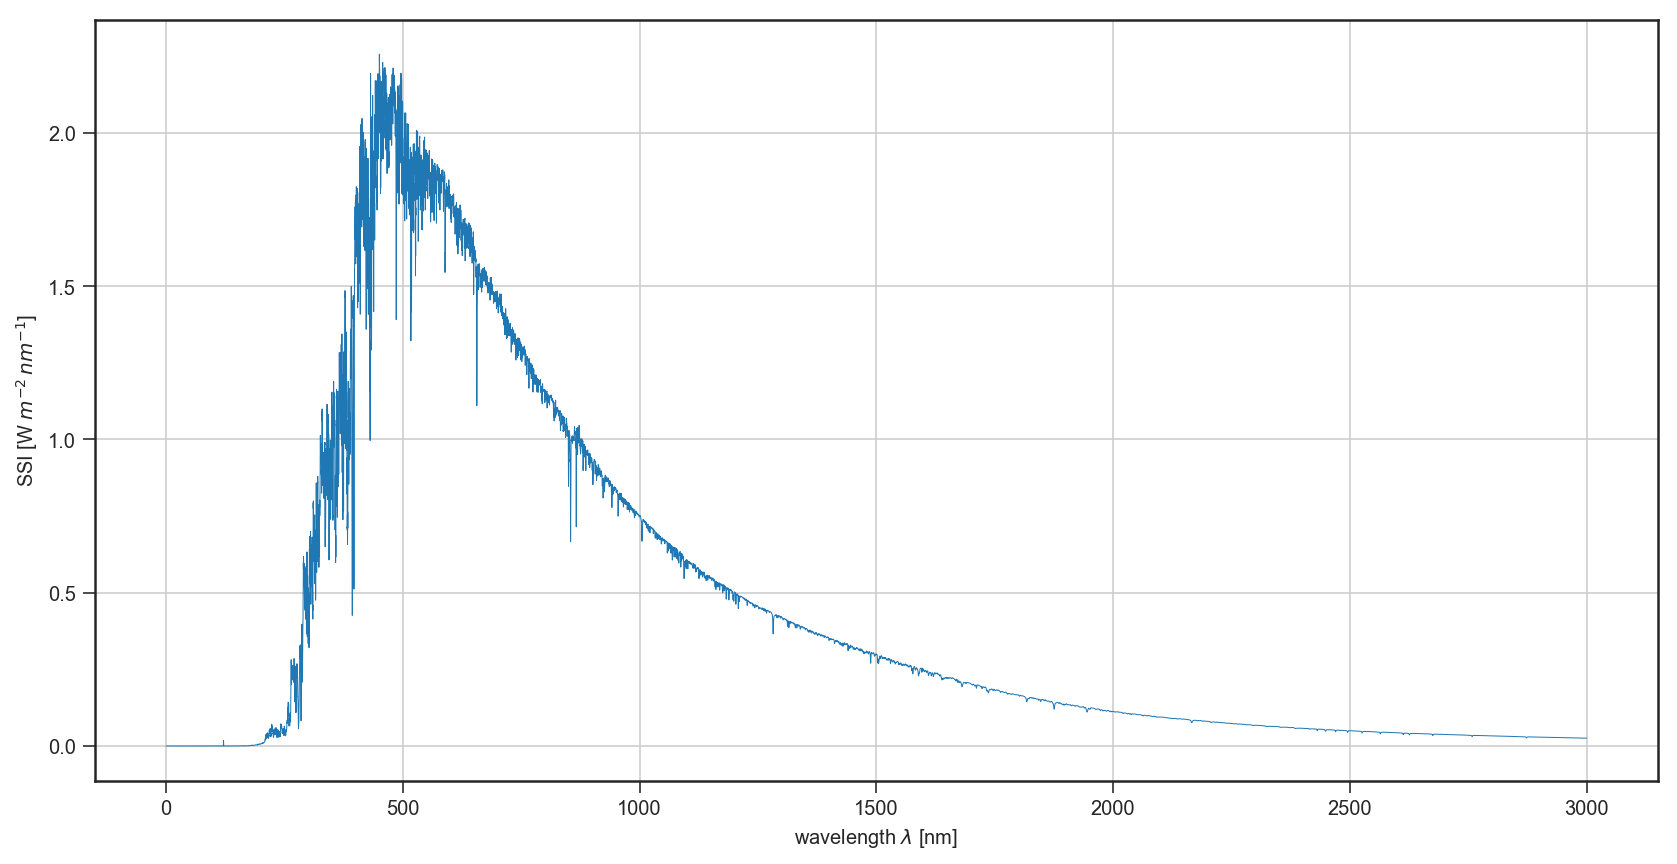

In [4]:
x,y=np.loadtxt('./data/solar_reference_spectrum_2018.dat', usecols=[0,1], unpack=True)

plt.figure(figsize=(14, 7))
plt.plot(x,y,lw=0.5)
plt.xlabel(r'wavelength $\lambda$ [nm]')
plt.ylabel(r'SSI [W $m^{-2}\, nm^{-1}$]')
plt.grid()
plt.show()

## Measure the Temperature of Sirius

<img src="https://cdn.spacetelescope.org/archives/images/screen/heic0516e.jpg" width="40%">


<div style="text-align: justify"> 
<p>
Sirius (also called α CMa according to the Bayer designation) is a star in the constellation Canis Major to the left and below Orion. Its name comes from ancient Greek meaning “glowing” or “scorcher.” Sirius is the brightest star in the night sky. This is not surprising since, with a distance of only nine lightyears from Earth, Sirius is one the closest stars to us in the Universe. While the naked eye perceives Sirius as a single star, investigation with telescopes reveal that Sirius is a binary star system consisting of a bright white star, named Sirius A, accompanied by a faint white dwarf, called Sirius B (α CMa B). Sirius A (α CMa A) is about two times more massive and 25 times more luminous than our Sun.
</p>

</br>
In the following you should use this spectrum and the results of the Wien's displacement law to estimate the temperature of our sun.  

</div>

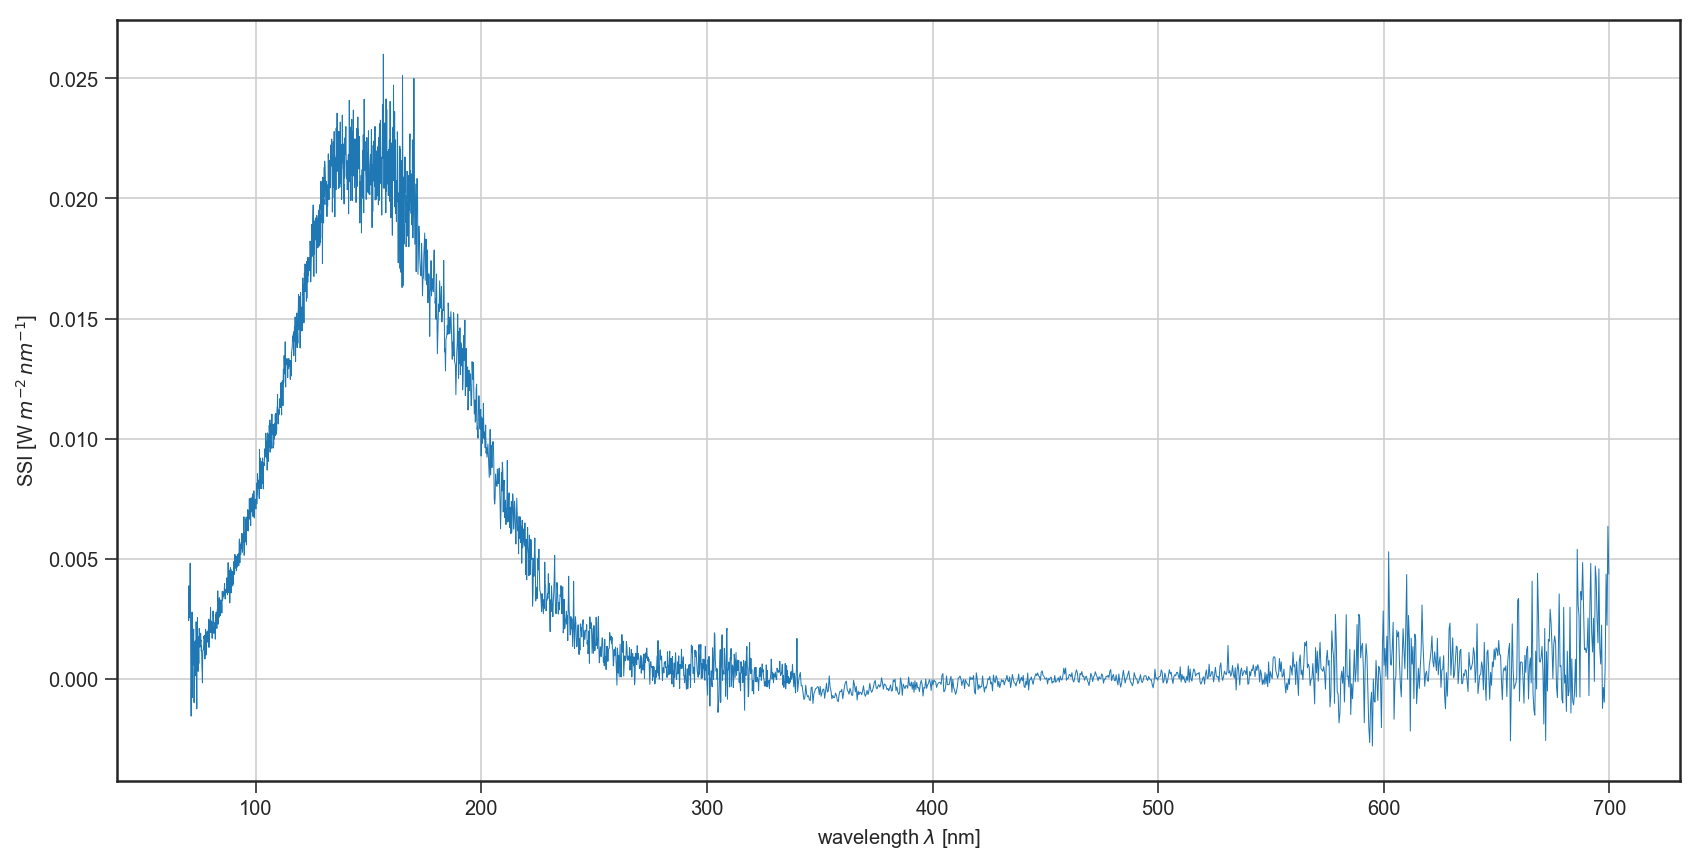

T_sun = 24175.000000000015


In [5]:
x,y=np.loadtxt('./data/sirius_b_spectrm.dat', usecols=[0,1], unpack=True,skiprows=16)

plt.figure(figsize=(14, 7))
plt.plot(x,y,lw=0.5)
#plt.xlim([0,1500])
plt.xlabel(r'wavelength $\lambda$ [nm]')
plt.ylabel(r'SSI [W $m^{-2}\, nm^{-1}$]')
plt.grid()
plt.show()


T_sun = Tmax[2]*lmax[2]/120
print('T_sun =',T_sun)


In [6]:
## Measure the Temperature of Proxima Centauri A


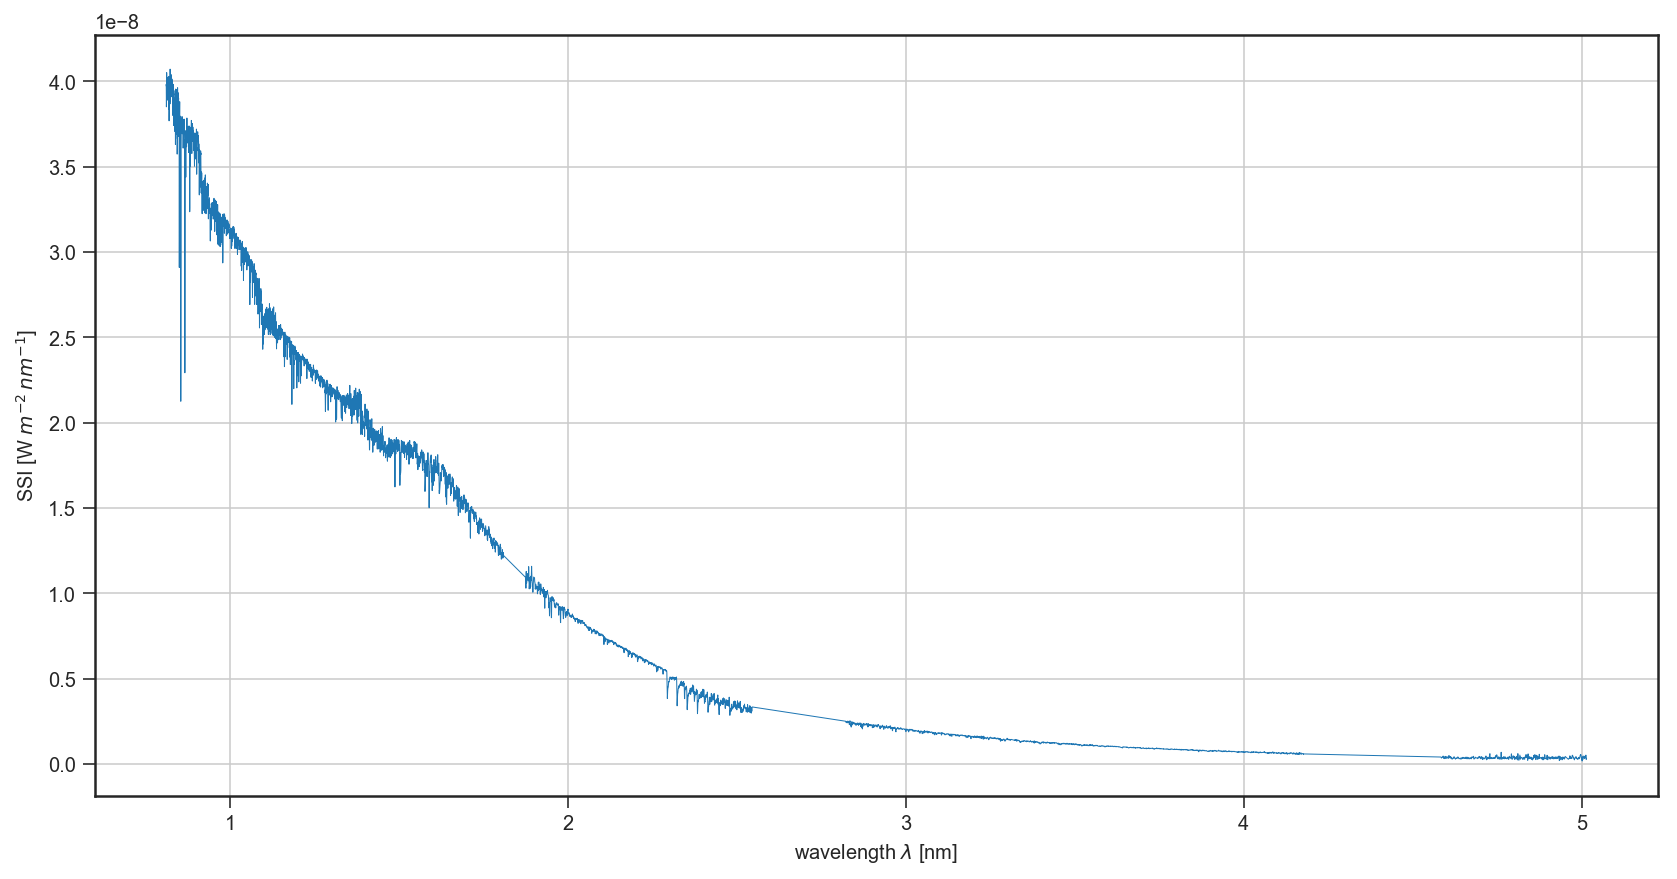

In [7]:
x,y=np.loadtxt('./data/arcturus_spectrum.dat', usecols=[0,1], unpack=True,skiprows=48)

plt.figure(figsize=(14, 7))
foo=np.where(y>0)
#plt.xlim([0,5000])
plt.plot(x[foo],y[foo],lw=0.5)
plt.xlabel(r'wavelength $\lambda$ [nm]')
plt.ylabel(r'SSI [W $m^{-2}\, nm^{-1}$]')
plt.grid()
plt.show()

In [8]:
T_sun = Tmax[2]*lmax[2]/140
print('T_sun =',T_sun)

T_sun = 20721.428571428583


# References

In [9]:
print(plt.style.available)

['_classic_test', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10']


In [10]:
from astroquery.simbad import Simbad
from astroquery.sdss import SDSS
from astroquery.heasarc import Heasarc
from astroquery.gaia import Gaia
result_table = Simbad.query_objectids("sirius b")

#result_table = Heasarc.query_object("sirius b", mission='rospublic')

#result_table = Gaia.query_object("sirius b")




#result_table = SDSS.query_specobj("sirius b")

print(result_table)

/Users/jens/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/jens/anaconda3/lib/python3.6/site-packages/astroquery/sdss/__init__.py:29: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "


Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
          ID         
---------------------
        NAME Sirius C
       NAME Sirius BC
        NAME Sirius B
2RXF J064508.6-164240
          * alf CMa B
             2E  1730
   2RE J064509-164243
        2RE J0645-164
          8pc 379.21B
          ADS  5423 B
                  ...
     [BM83] X0642-166
     1E 064255-1639.3
        1ES 0642-16.6
       2E 0642.9-1638
     2EUVE J0645-16.7
      EUVE J0645-16.7
    WDS J06451-1643BC
        ** AGC    1BC
1RXS J064509.3-164241
     1E 064255-1639.4
      RX J0645.1-1642
Length = 39 rows


In [11]:
qso = SDSS.get_spectral_template(kind='qso')
Astar = SDSS.get_spectral_template(kind='star_A')
Fstar = SDSS.get_spectral_template(kind='star_F')

In [12]:
print(SDSS.AVAILABLE_TEMPLATES)

{'star_O': 0, 'star_OB': 1, 'star_B': 2, 'star_A': [3, 4], 'star_FA': 5, 'star_F': [6, 7], 'star_G': [8, 9], 'star_K': 10, 'star_M1': 11, 'star_M3': 12, 'star_M5': 13, 'star_M8': 14, 'star_L1': 15, 'star_wd': [16, 20, 21], 'star_carbon': [17, 18, 19], 'star_Ksubdwarf': 22, 'galaxy_early': 23, 'galaxy': [24, 25, 26], 'galaxy_late': 27, 'galaxy_lrg': 28, 'qso': 29, 'qso_bal': [30, 31], 'qso_bright': 32}


In [13]:
whitedwarf = SDSS.get_spectral_template(kind='star_wd')

# Stefan-Boltzmann law
The Stefan-Boltzmann law is a relation between the power (energy per time unit) emitted by a blackbody and the temperature of the blackbody. If we apply it to the emission of stars, it states that the star luminosity is directly proportional to the fourth power of the surface temperature of the star. The value of the proportionality constant depends on other fundamental constants in nature, such as the Boltzmann constant k*, the Planck constant *h, and the speed of light c. To learn more about the Stefan-Boltzmann law, see the material available on the ESA webpage


\begin{align}
B_{\lambda}(T) & = \frac{2\,h\,c^2}{\lambda^5(\mathrm{e}^{\frac{hc}{2\lambda\, k_B\, T}}-1)}
\end{align}

The law giving the total energy flux or power per unit surface area emitted from a black body at Temperature T can be computed by solving the following integral:
\begin{align}
F(T) & = \pi \int_0^{\infty} \mathrm{d\lambda} \, B_{\lambda}(T) \\
& = \sigma_{\mathrm{SB}}\, T^4 \, ,
\end{align}

where the Stefan-Boltzmann constant has a value of $\sigma_{\mathrm{SB}}= 5.67\times 10^{-8} \,[\mathrm{W}\mathrm{m}^{-2}\mathrm{K}^{-4}]$ (for a detailed derivation of the Stefan-Boltzmann law see e.g. [???]).

The total emitted power $L_{\star}$ of a spherical star of temperature $T_{\star}$ and radius radius $R_{\star}$ can therefore optained by simply multiplying the Stefan-Boltzmann law with the stars surface area $A_{\star}= 4 \pi \, R^2_{\star}$:
<font color='blue'>
\begin{align}
L_{\star} & = 4 \pi \, R^2_{\star} \, \sigma_{\mathrm{SB}} \, T^4_{\star} \\
\end{align}</font>

This remarkable simple equation has pronounced consequences for astronomical observations. It establishes an immediate relation between the observable total emmited power $L_{\star}$ and temperature $T_{\star}$ of a star with its size $R_{\star}$. 

Astronomers can use this law of stellar radiation to study the properties and the evolution of stars in the galaxy.


# Hertzsprung-Russel diagram

Now that we know how to determine the surface temperature of a star and how to compute the star luminosity given its surface temperature, we can go straight to the last step of this lecture. We are going to see where the stars are located in the Hertzsprung-Russell diagram.
The Hertzsprung-Russell diagram (HR diagram) is one of the most important tools in the study of stellar evolution. Developed independently in the early 1900s by Ejnar Hertzsprung and Henry Norris Russell, it plots the temperature of stars against their luminosity. This is the theoretical HR diagram. Scientists also refer to more observational properties of the stars. In particular, they can plot the colour of stars (or spectral type) against their absolute magnitude. In this case, we talk of the observational HR diagram, also known as a colour-magnitude diagram. Depending on its initial mass, every star goes through specific evolutionary stages dictated by its internal structure and how it produces energy. Each of these stages corresponds to a change in the temperature and luminosity of the star, which can be seen to move to different regions on the HR diagram as it evolves. This reveals the true power of the HR diagram – astronomers can know a star’s internal structure and evolutionary stage simply by determining its position in the diagram.


![Screen%20Shot%202018-08-22%20at%2011.04.42.png](https://github.com/jjasche/blackbody/blob/martina/Screen%20Shot%202018-08-22%20at%2011.04.42.png)


From the figure, we can identify 3 main regions (or evolutionary stages) of the HR diagram:

- The main sequence stretching from the upper left (hot, luminous stars) to the bottom right (cool, faint stars) dominates the HR diagram. It is here that stars spend about 90% of their lives burning hydrogen into helium in their cores. Main sequence stars have a luminosity class labelled V.

- Red giant and supergiant stars (luminosity classes I through III) occupy the regions above the main sequence. They have low surface temperatures and high luminosities. According to the Stefan-Boltzmann law that we have discovered above, means giant and supergiant stars also have large radii. Stars enter this evolutionary stage once they have exhausted the hydrogen fuel in their cores and have started to burn helium and other heavier elements.

- White dwarf stars (luminosity class D) are the final evolutionary stage of low to intermediate mass stars, and are found in the bottom left of the HR diagram. These stars are very hot but have low luminosities due to their small size.

The Sun is found on the main sequence with a luminosity of 1 and a temperature of around 5,400 Kelvin.
Astronomers generally use the HR diagram to either summarise the evolution of stars, or to investigate the properties of a collection of stars. In particular, by plotting a HR diagram for either a globular or open cluster of stars, astronomers can estimate the age of the cluster from where stars appear to turnoff the main sequence (see the entry on main sequence for how this works).

[text adapted from Swinburne University of Technology](http://astronomy.swin.edu.au/cosmos/h/hertzsprung-russell+diagram)

also see ESA resources [here](http://sci.esa.int/education/35774-stellar-radiation-stellar-types/?fbodylongid=1703)
[and here](https://www.cosmos.esa.int/web/cesar/the-hertzsprung-russell-diagram!).




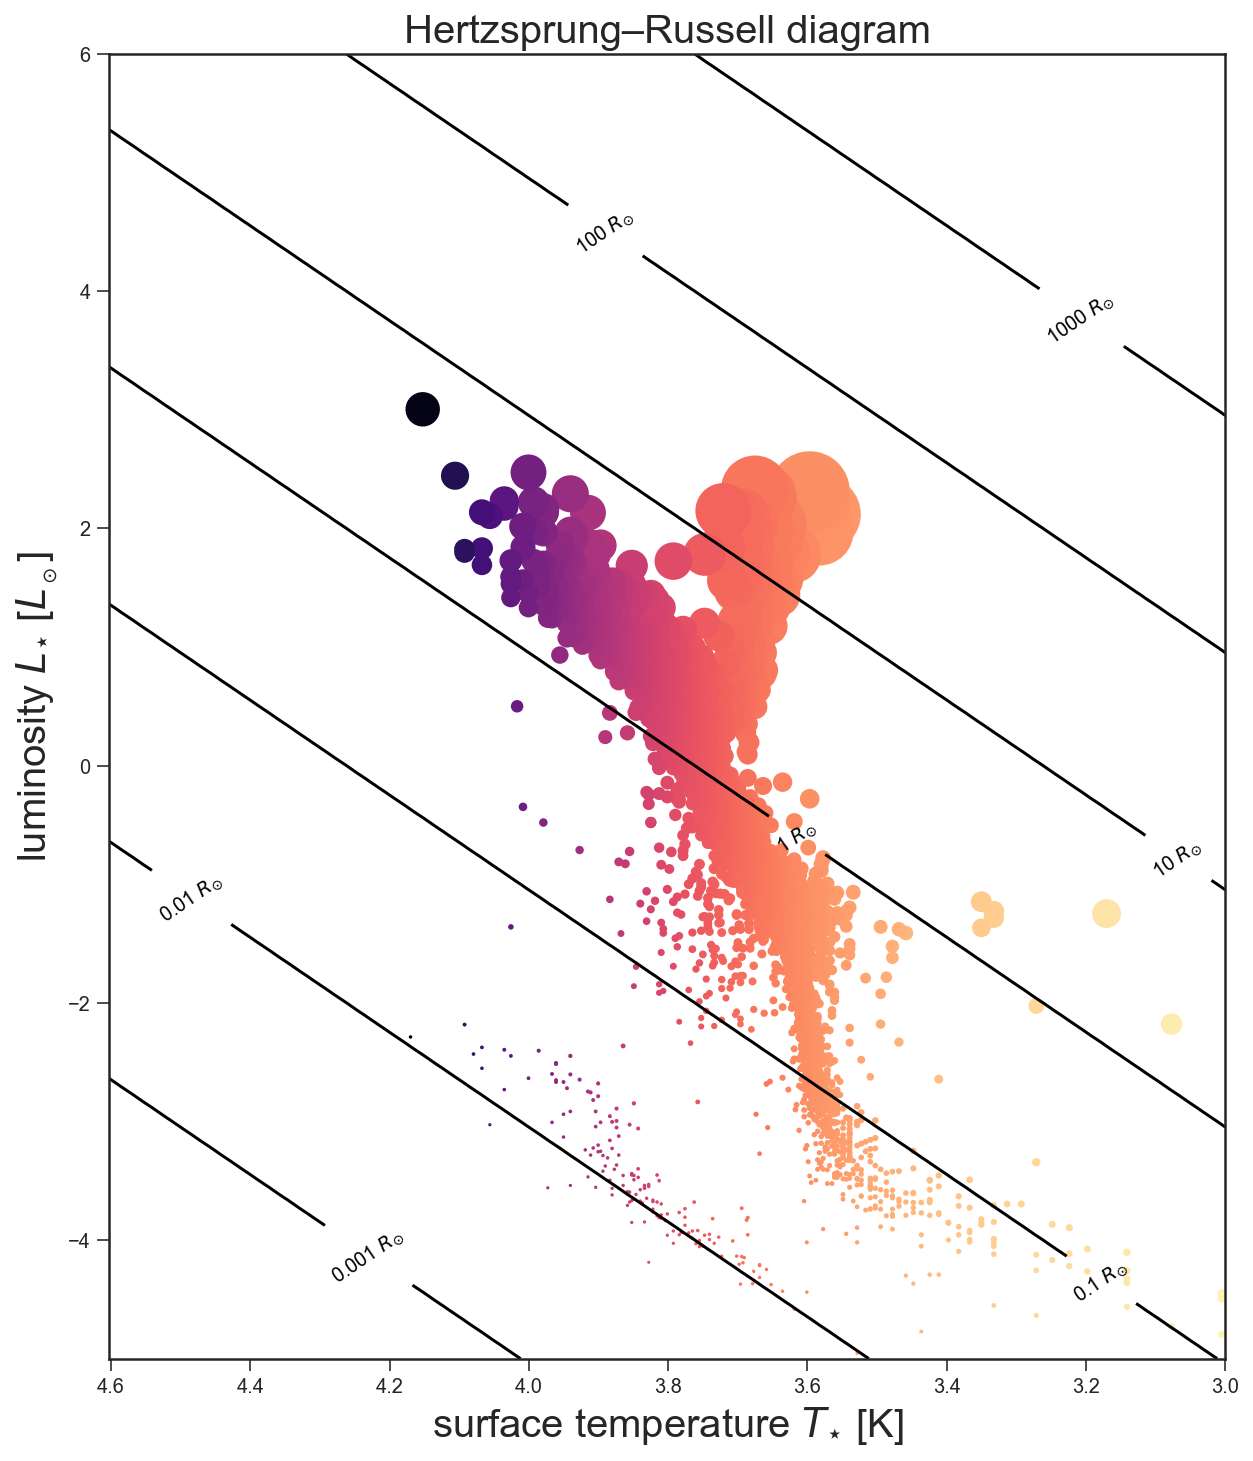

In [15]:
Ts,Mag=np.loadtxt('./data/stars.txt', usecols=[0,1], unpack=True)
Ls=Lsun*10**(0.4*(4.74-Mag))
plot_HR(L=Ls,T=Ts)

# Habitable zones around stars

One of the most fascinating question of modern science concerns the emergence of life and where to find it in the galaxy. According to our current understanding, the most important requirement to sustain life is liquid water. This is the reason why scientists are interested in searching for environments in the Universe that can provide liquid water. In particular at planets the presence of liquid water depends on many environmental conditions like the temperature and pressure of the atmosphere. The main driver of the surface temperature of a planet however is the central star, around which the planet orbits at some distance.

At least on earth liquid water is essential to the existence of life. For this reason regions around stars that permit surface temperatures between 273 K, the melting point of water, and 373 K, the boiling point of water, are called habitable zones. The proposed definition of a habitable zone thus is clearly based on the hypothesis that extraterrestrial life shares this requirement.

\begin{align}
L_{\star} & = 4 \pi \, R^2_{\star} \, \sigma_{\mathrm{SB}} \, T^4_{\star} \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}



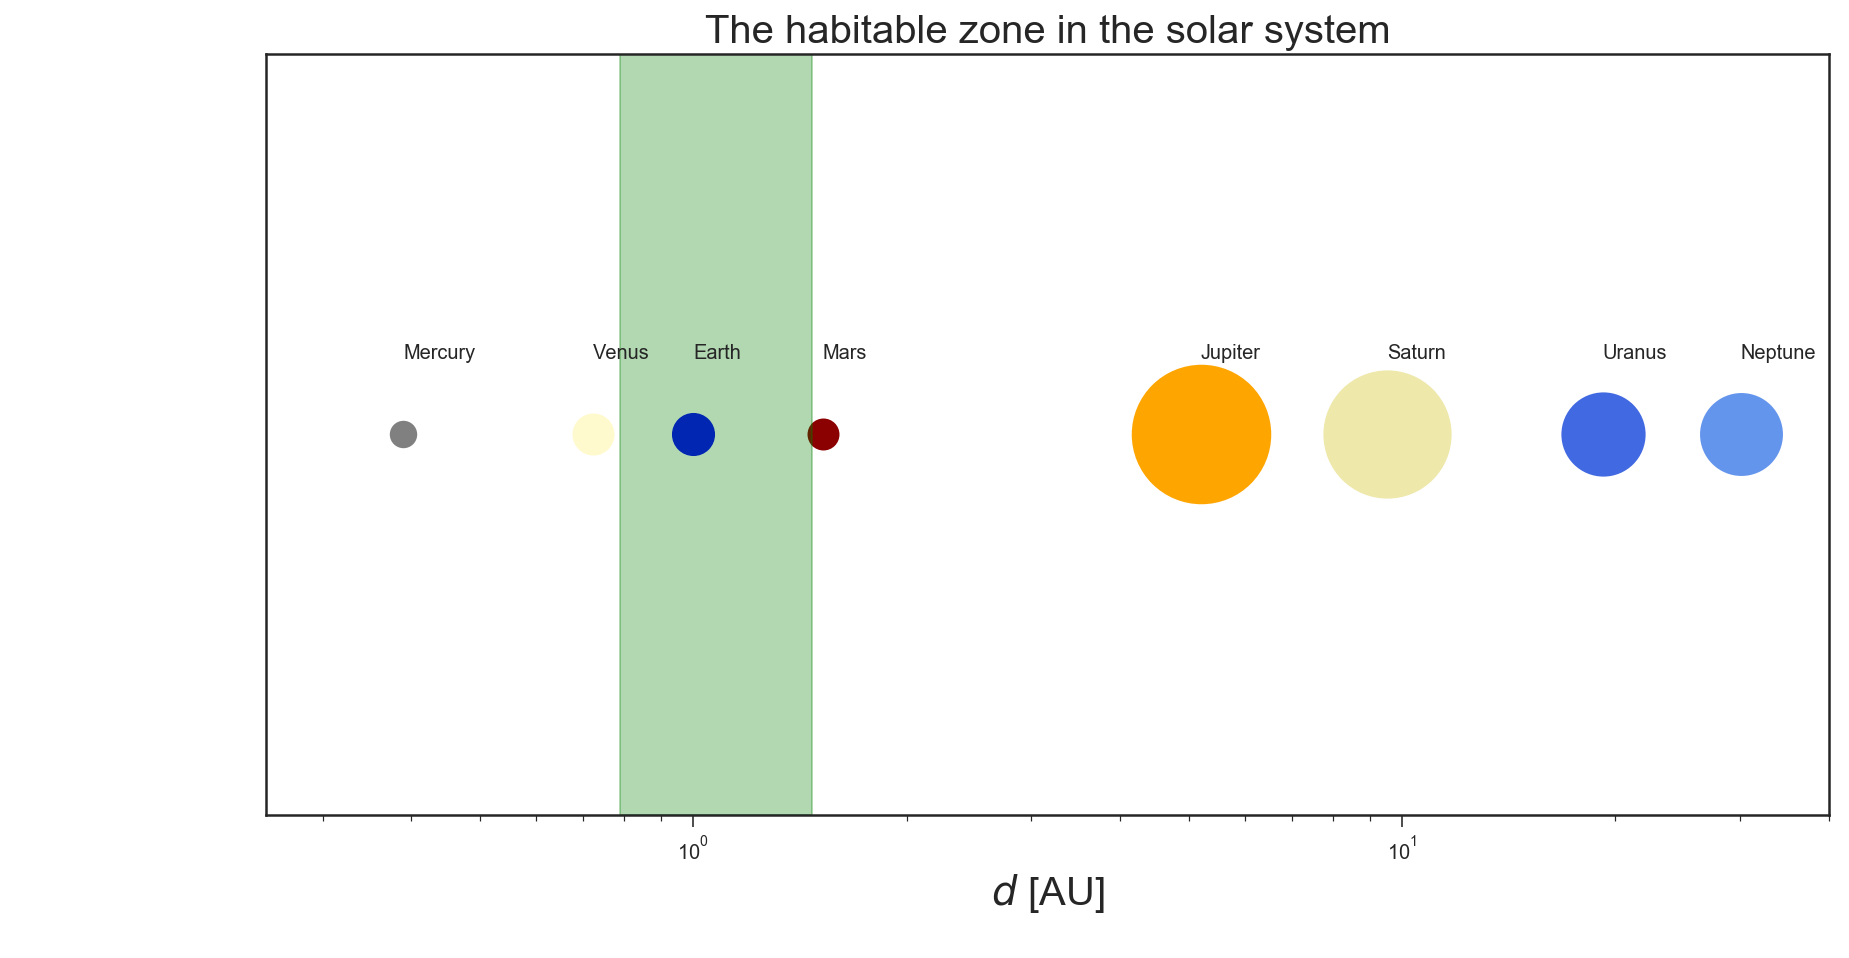

In [17]:
T_lower = 373 #K
T_upper = 273 #K

d_lower = np.sqrt(0.5*Lsun/(4.*np.pi*sigmaSB*T_lower**4))/AU
d_upper = np.sqrt(0.5*Lsun/(4.*np.pi*sigmaSB*T_upper**4))/AU


plot_hz(lower_limit=d_lower,upper_limit=d_upper)  

# Summary: What have we learned?

# References


Habitable zone https://arxiv.org/pdf/1708.09766.pdf
some notes on BlaclBody radiation http://www.csc.kth.se/~cgjoh/ambsblack.pdf , some more black body stuff http://www.public.asu.edu/~hhuang38/mae578_lecture_03.pdf